## 1. 필요 Library 설치

In [1]:
!pip install beautifulsoup4

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [108]:
!pip install pillow

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [110]:
!pip install wordcloud

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


## 2. 실행 코드

### (1) 라이브러리 불러오기

In [1]:
from bs4 import BeautifulSoup
from wordcloud import WordCloud
from PIL import Image

import pandas as pd
import numpy as np
import random
import requests
import re

import matplotlib.pyplot as plt
from matplotlib import font_manager
import seaborn as sns

### (2) 네이버 종목 토론방 긁어오기

In [2]:
def stock_discussion_room(stock_code, pages):
    
    opinion_date_total = []
    opinion_total = []
    chanti = []
    anti = []
    
    r = re.compile(r'\d{4}.\d{2}.\d{2}')
    
    for i in range(pages) :
        
        url = 'https://finance.naver.com/item/board.nhn?code=' + stock_code + '&page=' + str(i+1)
        response = requests.get(url)
        html = response.text
        soup = BeautifulSoup(html, 'html.parser')
        opinion = soup.select('.title')
        opinion_date = []
        
        for date in soup.find_all('span') : 
            match = r.search(date.text)
            
            if match != None :
                opinion_date.append(match.group())

        opinion_date = opinion_date[-20:]
        
        for value in opinion_date : 
            opinion_date_total.append(value)
        
        for i in range(20) :    
            opinion_total.append(opinion[i].find('a')['title'])
                   
        for i, finger in enumerate(soup.find_all('strong')) :
            
            if i in np.arange(2,42, step = 2) :     
                chanti.append(finger.text)

            elif i in np.arange(3,42, step = 2) :
                anti.append(finger.text)
    
    return opinion_date_total, opinion_total, chanti, anti

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [27]:
opinion_date_total, opinion_total, chanti, anti = stock_discussion_room('086250', 50)

In [28]:
df = pd.DataFrame({'날짜' : opinion_date_total, '토론제목' : opinion_total, '찬성' : chanti, '반대' : anti})

In [29]:
df['날짜'].unique()

array(['2019.12.31', '2019.12.30', '2019.12.29', '2019.12.28',
       '2019.12.27', '2019.12.26', '2019.12.25', '2019.12.24',
       '2019.12.23', '2019.12.22', '2019.12.21', '2019.12.20',
       '2019.12.19', '2019.12.18', '2019.12.17', '2019.12.16',
       '2019.12.14', '2019.12.13', '2019.12.12'], dtype=object)

In [30]:
df.head()

,날짜,토론제목,찬성,반대
0,2019.12.31,제대로 찾아봐라,0,1
1,2019.12.31,금형회사가 왜 바이오와 연관되는건지요?,0,1
2,2019.12.31,쩜상릴레이 6번 갈듯,1,1
3,2019.12.31,작전질더럽게하네,0,1
4,2019.12.31,바이오,0,1


### (3) 인간지표 구하기

In [31]:
df['인간지표'] = np.nan
for i in range(df.shape[0]) :
    if int(df['찬성'][i]) == int(df['반대'][i]) :
        df['인간지표'][i] = '중립'
    elif int(df['찬성'][i]) > int(df['반대'][i]) :
        df['인간지표'][i] = '찬티'
    elif int(df['찬성'][i]) < int(df['반대'][i]) :
        df['인간지표'][i] = '안티'
df

C:\Users\woong\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\woong\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


,날짜,토론제목,찬성,반대,인간지표
0,2019.12.31,제대로 찾아봐라,0,1,안티
1,2019.12.31,금형회사가 왜 바이오와 연관되는건지요?,0,1,안티
2,2019.12.31,쩜상릴레이 6번 갈듯,1,1,중립
3,2019.12.31,작전질더럽게하네,0,1,안티
4,2019.12.31,바이오,0,1,안티
5,2019.12.31,8시 50분이면 대략 시초가 알수있나요??,0,0,중립
6,2019.12.31,●찬티 화이팅,0,0,중립
7,2019.12.31,■■극찬티하라 전군■■,1,1,중립
8,2019.12.31,안티할시간에사,1,2,안티
9,2019.12.31,"대박)이낙연이 삼촌,조카로부르는사이!뉴스뜸!",0,1,안티


### (4) 워드클라우드 살펴보기

In [32]:
contents = " "
for content in df['토론제목'] : 
    contents = contents + " " + content
contents


"  제대로 찾아봐라 금형회사가 왜  바이오와 연관되는건지요? 쩜상릴레이 6번 갈듯 작전질더럽게하네 바이오 8시 50분이면 대략 시초가 알수있나요?? ●찬티 화이팅 ■■극찬티하라 전군■■ 안티할시간에사 대박)이낙연이 삼촌,조카로부르는사이!뉴스뜸! 스마트***** 넌 이제 쩜상 진행~~~~!!!!!!!!! ●●극찬티하라●● 아니근데 시총 최소 5천억 이상. 그전에는 추매만 있을뿐 ●●극찬티하라●● 축하한다 모두들, 네오파마 공부합시다 목요일 상한가 후 다음주 화요일부터 대폭락예정 이노와이즈코리아 주주님들 새해 대박나세요 개장일이 너무 기다려 지네요 이만주 ㅎ 월봉 장대~~~ ■■연휴동안■■ [주식소셜 가넷대전 총상금 600만원] 아랍 헬스케어 기업 'NMC', 주가 1650% 폭등 ●찬티 화이팅 미련 없어요. 에이치엘비 8배상승 재료가. 네오파마 협력이다 와 운전죽이네 웃긴다  ■■캡주면 튀면됨 힘이좋내....부체도 많이  줄어들겠내.. 새해에도 희망 여기 재무상페감인데 횡령배임 걱정안해도 되나요? 3연상 년초까지 현재 꼭지 같은데 앞으로 어떻게 대응해야 될까요?? 눈치빠른 사람은 알텐데. 신약 9개. 양수 물량이나 털리지말고 조용히 있으십시다. 외국인 다 팔앗어요.먹고 튀엇음 .ㅇ내일부터 주주장창 하한가 예약임니더 화신테크는 오르는 테마가 있나요>> 작전형님들 화신으로 와주세요 화신으로 오세요 마지막  갭 상승후    개 폭락   3번정도 흔들수있다 야 어제 소수계좌 ㅈㄹ 하던놈어디갓냐 친구들 1월2일 개장시간말이야 자동차회사가 이젠 바이오주로 화신? [삭제된 게시물의 답글]ㅈㅂ들아 ^^ 주가 이젠 거래량  터지면 × 도 모르는 애들이 세력조심. 넘 올라서 조심.  외치네 베장없어서 부자되것냐ㅋㅋ 배짱 없이 상한가 먹을려고?? 배당금정보 사이트 추천 부럽습니다 5810 상치면 7510 상치면 9760 상치면 12650 욕심히 과하연 얘는 전고가 7000원은 그냥 넘기겠다야~ 예전에 썬코어 내일부터 이틀 쉬나요? 무자본 M&A  결과는 다그렇지모  얍쌉하게 잘 

In [33]:
stock_img = Image.open('C:/Users/woong/Desktop/Youtube Contents/[Episode2] 네이버 종목토론방 찬티 vs 안티 인간지표별 주가 변동/화신테크.png')
mask = Image.new("RGB", stock_img.size, (255,255,255))
mask.paste(stock_img)
mask = np.array(mask)

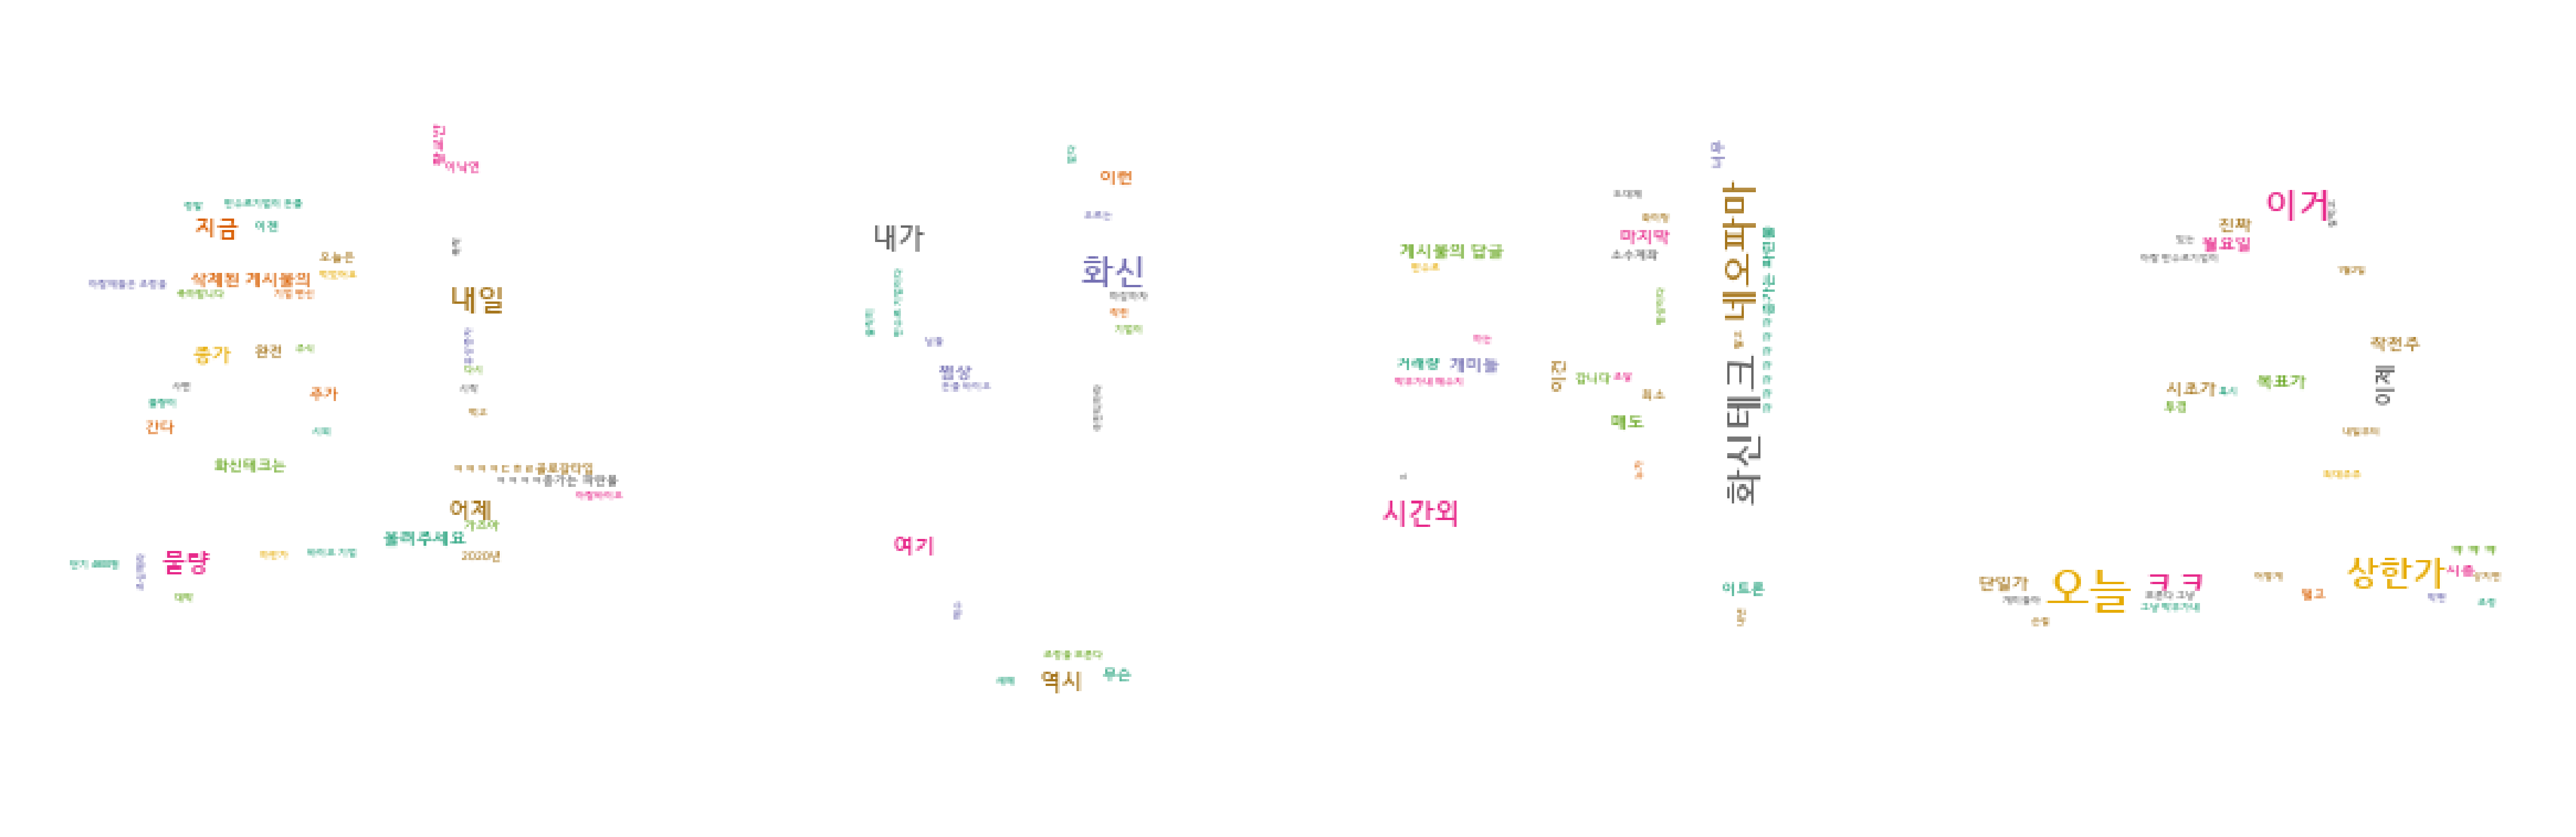

In [34]:
plt.figure(figsize = (80,30))
wc = WordCloud(font_path='C:\\Windows\\Fonts\\HANDotumB.ttf', background_color="white", colormap = "Dark2_r",
               max_words=2000, mask=mask, max_font_size=300, random_state=42)
               
wc.generate_from_text(contents)

plt.imshow(wc)
plt.axis("off")
plt.savefig('WC_화신테크.png')

### (5) 인간지표 별 주가 그래프 그리기

In [35]:
df_test = df[['날짜', '인간지표']]
df_dummies = pd.get_dummies(df_test['인간지표'])
df_hodu = pd.concat([df_test['날짜'], df_dummies], axis = 1)
df_hodu = df_hodu.groupby('날짜').sum()

In [36]:
df_hodu.head()

,안티,중립,찬티
날짜,,,
2019.12.12,3,4,7
2019.12.13,0,1,4
2019.12.14,0,0,2
2019.12.16,1,1,7
2019.12.17,0,1,3


In [37]:
def daily_stock_close(stock_code):
    
    daily_close = []
    date = []
    
    url = 'https://finance.naver.com/item/frgn.nhn?code=' + stock_code
    response = requests.get(url)
    html = response.text
    soup = BeautifulSoup(html, 'html.parser')
    
    for i in range(3,len(soup.select('table.type2')[1].select('tr'))) :
        
        try :
            daily_close.append(soup.select('table.type2')[1].select('tr')[i].select('td')[1].text.replace(',' , ''))
            date.append(soup.select('table.type2')[1].select('tr')[i].select('td')[0].text)
            
        except IndexError :
            continue
        
    return date, daily_close

## 종목코드
 - 삼성전자 : 005930
 - 셀트리온 : 068270
 - 에이치엘비 : 028300
 - 젬백스 : 082270
 - 메드팩토 : 235980
 - 플리토 : 300080
 - 화신테크 : 086250

In [38]:
date, daily_close = daily_stock_close("086250")

In [39]:
df_close = pd.DataFrame({"날짜" : date, "종가" : daily_close})

In [40]:
df_close.head()

,날짜,종가
0,2019.12.30,5810
1,2019.12.27,4475
2,2019.12.26,4465
3,2019.12.24,3435
4,2019.12.23,2645


In [41]:
df = pd.merge(df_close, df_hodu, how = 'right', on = '날짜')

In [42]:
df.sort_values(['날짜'], ascending=True, inplace=True)

In [43]:
df.dropna(axis=0, inplace=True)
df.head()

,날짜,종가,안티,중립,찬티
11,2019.12.12,2300,3,4,7
10,2019.12.13,2290,0,1,4
9,2019.12.16,2420,1,1,7
8,2019.12.17,2335,0,1,3
7,2019.12.18,2545,6,18,26


In [44]:
df['종가'] = df['종가'].astype(int)

In [45]:
font_list = font_manager.findSystemFonts(fontpaths=None, fontext='ttf')
print('사용가능한 TTF 폰트 개수:', len(font_list))
font_list[:10] 

사용가능한 TTF 폰트 개수: 745


['C:\\WINDOWS\\Fonts\\courbd.ttf',
 'C:\\Windows\\Fonts\\MTEXTRA.TTF',
 'C:\\WINDOWS\\Fonts\\FTLTLT.TTF',
 'C:\\WINDOWS\\Fonts\\LFAXI.TTF',
 'C:\\WINDOWS\\Fonts\\ONYX.TTF',
 'C:\\Windows\\Fonts\\HANBatangExtBB.ttf',
 'C:\\WINDOWS\\Fonts\\GOUDYSTO.TTF',
 'C:\\WINDOWS\\Fonts\\VINERITC.TTF',
 'C:\\Windows\\Fonts\\GOTHICB.TTF',
 'C:\\Windows\\Fonts\\calibrili.ttf']

In [46]:
font_fname = 'C:\\Windows\\Fonts\\HANDotumB.ttf'
font_family = font_manager.FontProperties(fname=font_fname).get_name()
plt.rcParams["font.family"] = font_family

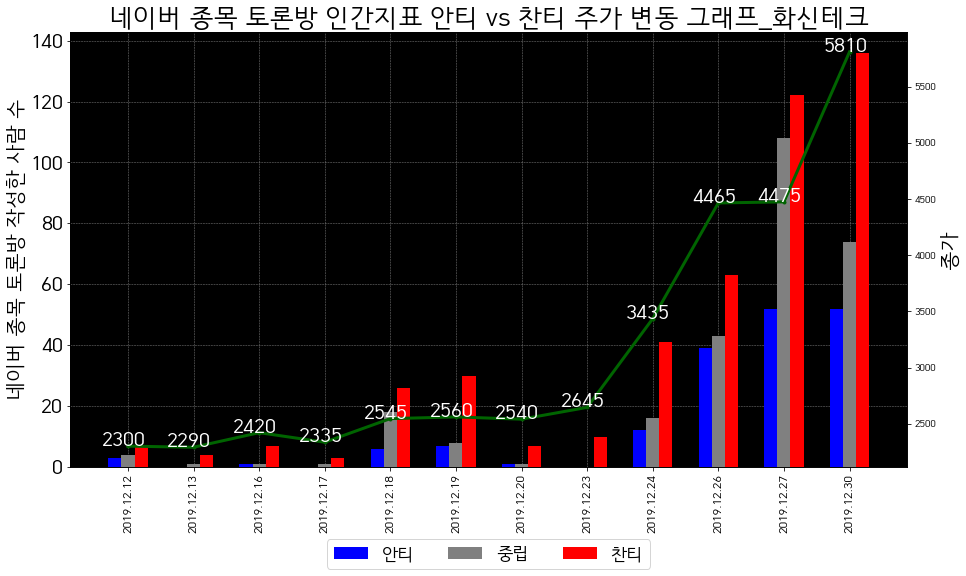

In [47]:
x = np.arange(len(df['날짜']))

fig, ax = plt.subplots(figsize=(15,8))
plt.bar(x+-0.2, df['안티'],width=0.2, label = '안티', color = 'blue')
plt.bar(x, df['중립'],width=0.2,  label = '중립', color = 'gray')
plt.bar(x+0.2, df['찬티'],width=0.2, label = '찬티', color = 'red')
plt.xticks(x, df['날짜'], fontsize='12', rotation = 90)
plt.title('네이버 종목 토론방 인간지표 안티 vs 찬티 주가 변동 그래프_화신테크', fontsize='25')
plt.yticks(fontsize=20)
ax.set_ylabel('네이버 종목 토론방 작성한 사람 수', fontsize = '20')
ax.patch.set_facecolor('black')
ax.set_axisbelow(True)
ax.xaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.yaxis.grid(True, color='gray', linestyle='dashed', linewidth=0.5)
ax.legend(bbox_to_anchor=(0.5, -0.2), loc = 'center', ncol = 3, fontsize=17)


ax2 = ax.twinx()
ax2.set_ylabel('종가', fontsize = 20)
ax2.plot(df['종가'].values, linestyle='-', marker='.', linewidth=3.0, color = 'darkgreen')

for i, x in enumerate(x):
    plt.text(x-0.4, df['종가'].values[i], df['종가'].values[i], fontsize=20, color ='white')

plt.savefig('인간지표 주가 변동 그래프_화신테크.png')
plt.show()